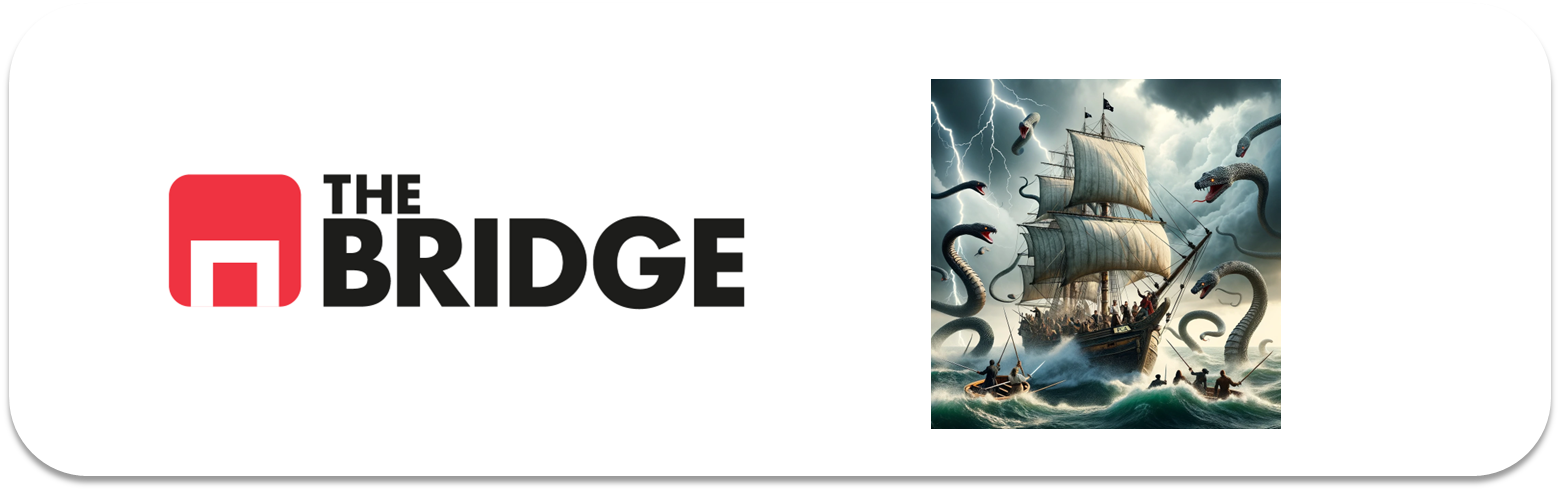

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [112]:
from funcion import*
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8, 6)
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score




### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [44]:
df = pd.read_csv('./credit_npo.csv')
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [46]:
#1
null_values = df.isnull().sum()
null_values

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64

In [47]:
df = df.dropna()

In [48]:
cardinalidad(df,10,10)

,Columna,Cardinalidad,% Cardinalidad,Valoración
0,SeriousDlqin2yrs,2,0.016926,Binaria
1,RevolvingUtilizationOfUnsecuredLines,10314,87.288422,Numérica Continua
2,age,78,0.660122,Numérica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,10,0.084631,Numérica Discreta
4,DebtRatio,11472,97.088693,Numérica Continua
5,MonthlyIncome,4167,35.265741,Numérica Continua
6,NumberOfOpenCreditLinesAndLoans,43,0.363913,Numérica Discreta
7,NumberOfTimes90DaysLate,13,0.110020,Numérica Discreta
8,NumberRealEstateLoansOrLines,16,0.135410,Numérica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,8,0.067705,Categórica


In [49]:
bin_edges = [-1, 1, 3, float('inf')]  
bin_labels = ['Nivel Bajo', 'Nivel Medio', 'Nivel Alto']
df['NumberOfTime30-59DaysPastDueNotWorse_grupo'] = pd.cut(df['NumberOfTime30-59DaysPastDueNotWorse'], bins=bin_edges, labels=bin_labels)

In [50]:
bin_edges = [-1, 1, 3, float('inf')]  
bin_labels = ['Nivel Bajo', 'Nivel Medio', 'Nivel Alto']
df['NumberOfDependents_grupo'] = pd.cut(df['NumberOfDependents'], bins=bin_edges, labels=bin_labels)

In [51]:
bin_edges = [-1, 1, 3, float('inf')]  
bin_labels = ['Nivel Bajo', 'Nivel Medio', 'Nivel Alto']
df['NumberOfTime60-89DaysPastDueNotWorse_grupo'] = pd.cut(df['NumberOfTime60-89DaysPastDueNotWorse'], bins=bin_edges, labels=bin_labels)

In [52]:
bin_edges = [-1, 1, 3, float('inf')]  
bin_labels = ['Nivel Bajo', 'Nivel Medio', 'Nivel Alto']
df['NumberOfTimes90DaysLate_grupo'] = pd.cut(df['NumberOfTimes90DaysLate'], bins=bin_edges, labels=bin_labels)

In [53]:
bin_edges = [-1, 1, 3, float('inf')]  
bin_labels = ['Nivel Bajo', 'Nivel Medio', 'Nivel Alto']
df['NumberRealEstateLoansOrLines_grupo'] = pd.cut(df['NumberRealEstateLoansOrLines'], bins=bin_edges, labels=bin_labels)

In [54]:
df=df.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfDependents','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse'],axis=1)

### MINIEDA

In [55]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
target="SeriousDlqin2yrs"

In [56]:
variables_cat=["NumberOfTime30-59DaysPastDueNotWorse_grupo","NumberOfDependents_grupo","NumberOfTime60-89DaysPastDueNotWorse_grupo","NumberOfTimes90DaysLate_grupo","NumberRealEstateLoansOrLines_grupo"]
variables_num=["RevolvingUtilizationOfUnsecuredLines","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans","age"]

In [57]:
cardinalidad(df,10,10)

,Columna,Cardinalidad,% Cardinalidad,Valoración
0,SeriousDlqin2yrs,2,0.016926,Binaria
1,RevolvingUtilizationOfUnsecuredLines,10314,87.288422,Numérica Continua
2,age,78,0.660122,Numérica Discreta
3,DebtRatio,11472,97.088693,Numérica Continua
4,MonthlyIncome,4167,35.265741,Numérica Continua
5,NumberOfOpenCreditLinesAndLoans,43,0.363913,Numérica Discreta
6,NumberOfTime30-59DaysPastDueNotWorse_grupo,3,0.025389,Categórica
7,NumberOfDependents_grupo,3,0.025389,Categórica
8,NumberOfTime60-89DaysPastDueNotWorse_grupo,3,0.025389,Categórica
9,NumberOfTimes90DaysLate_grupo,3,0.025389,Categórica


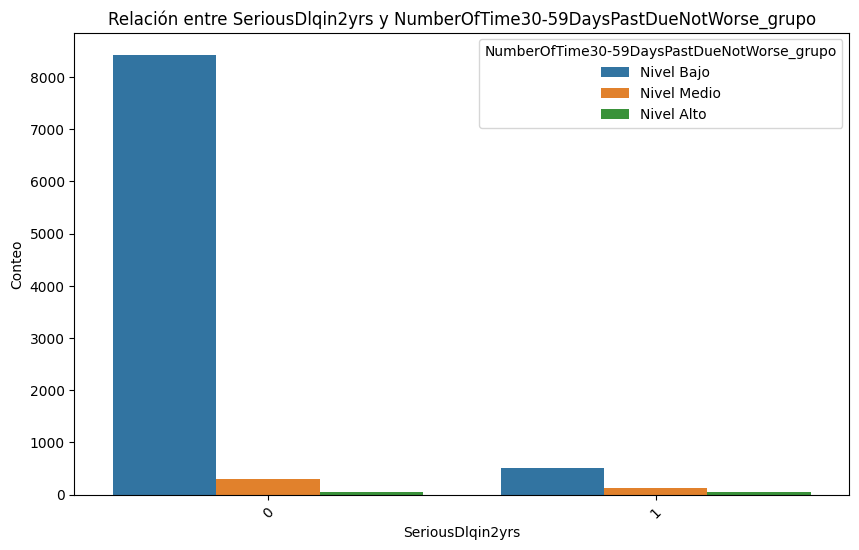

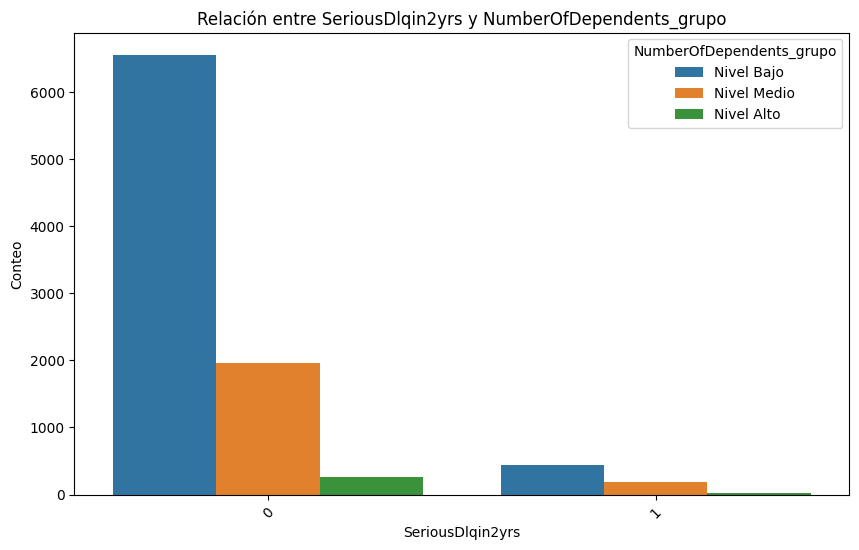

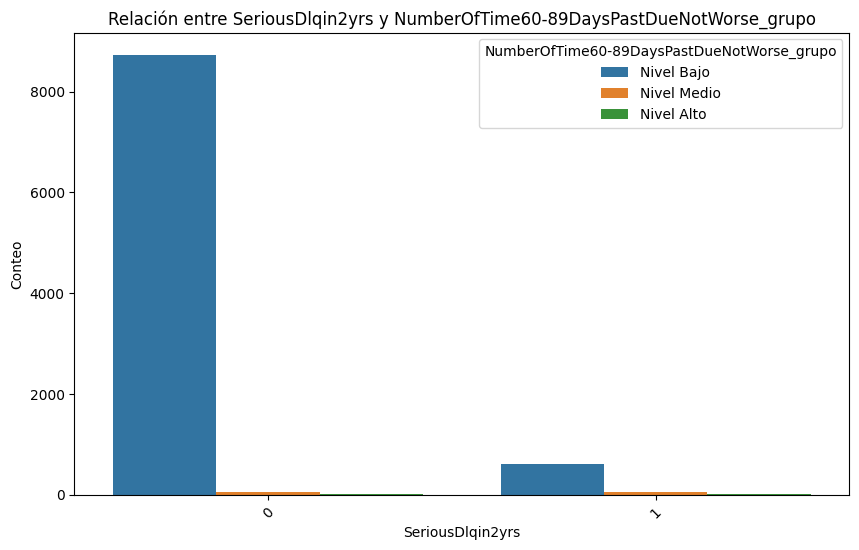

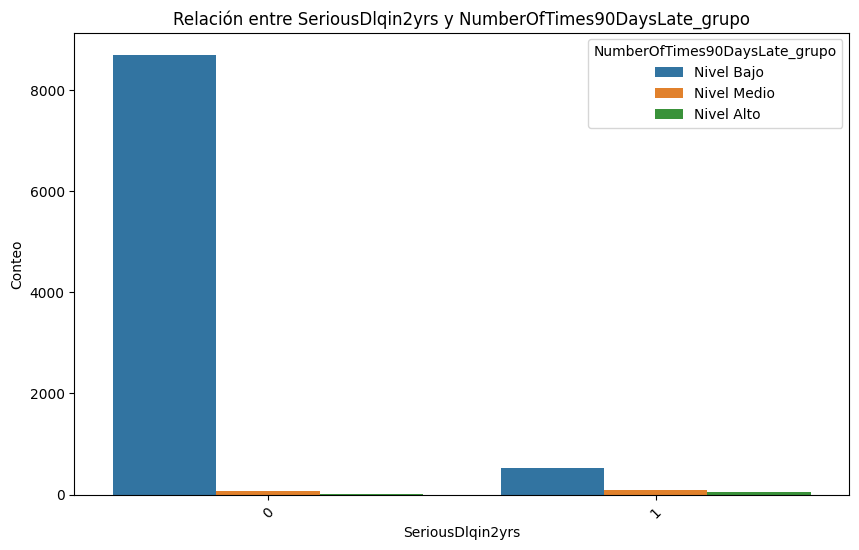

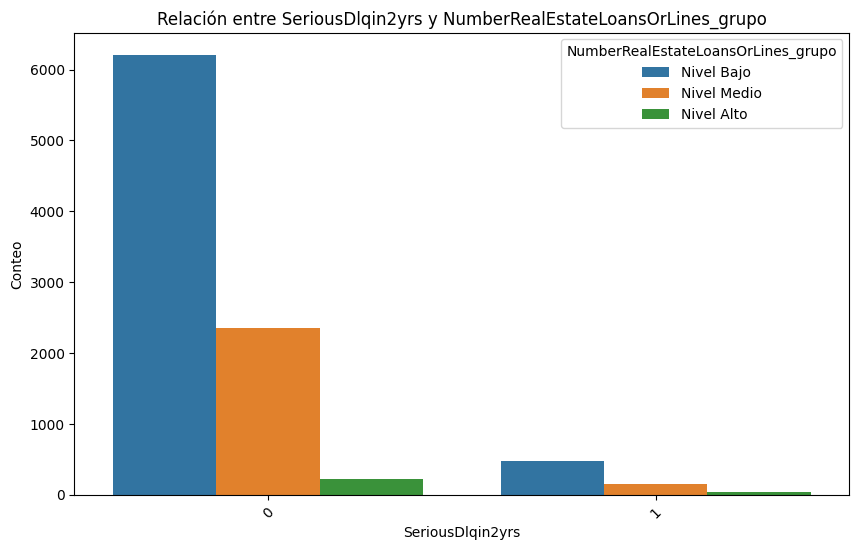

In [58]:
# VS CATEGÓRICAS
for x in variables_cat: 
    plot_categorical_relationship_fin(train_set,target,x)

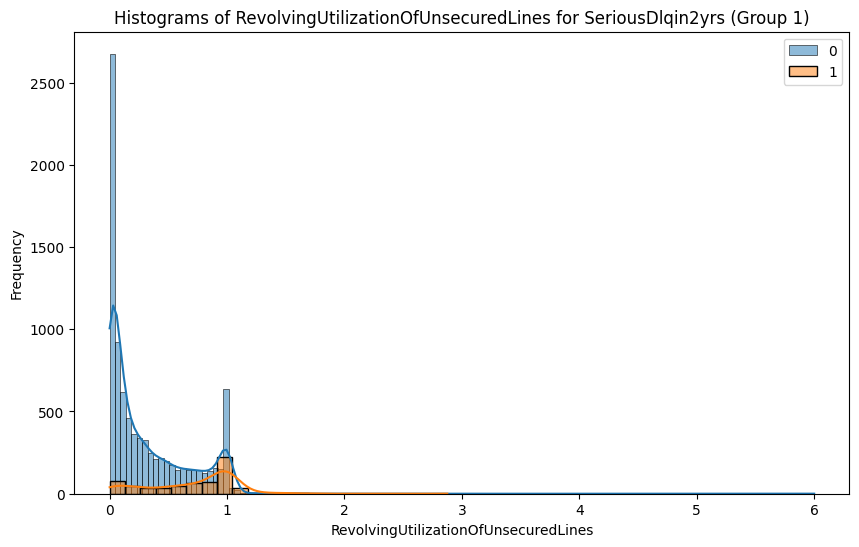

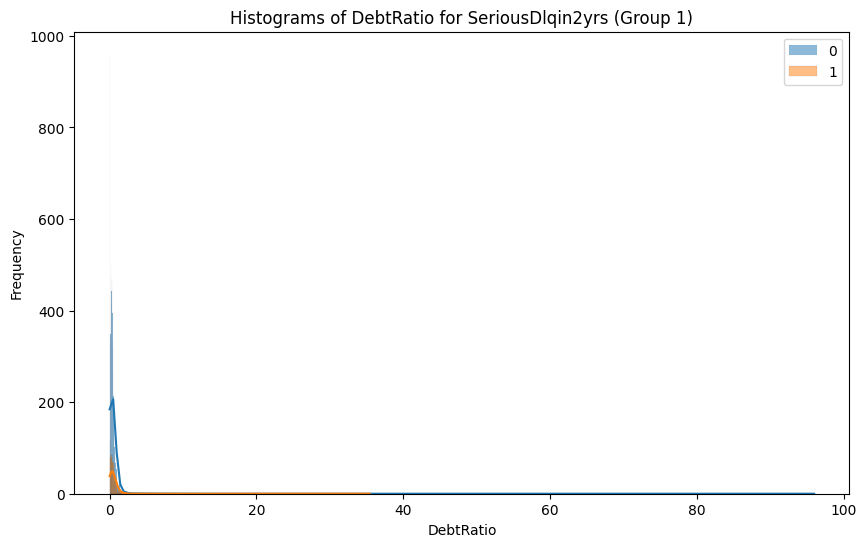

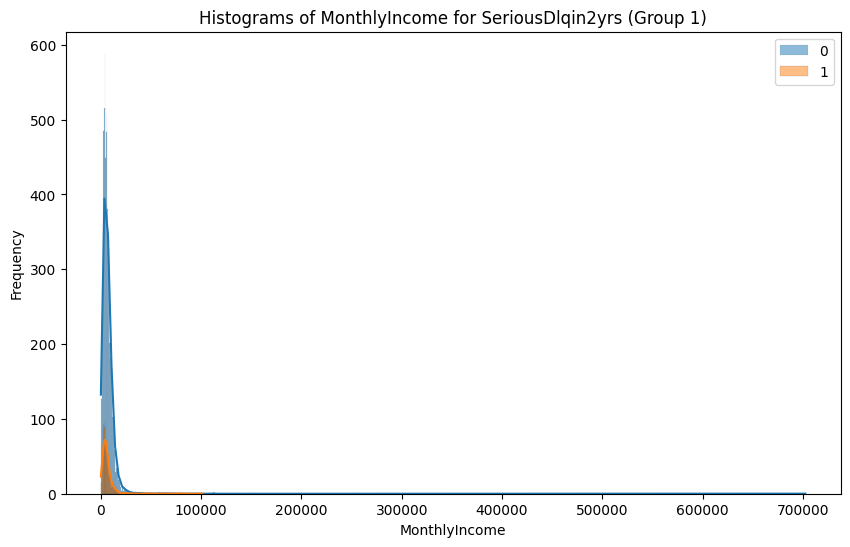

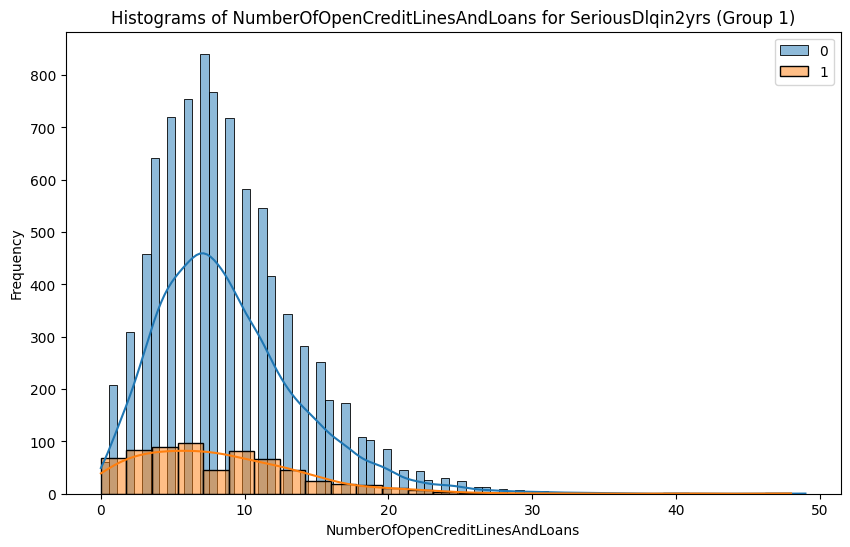

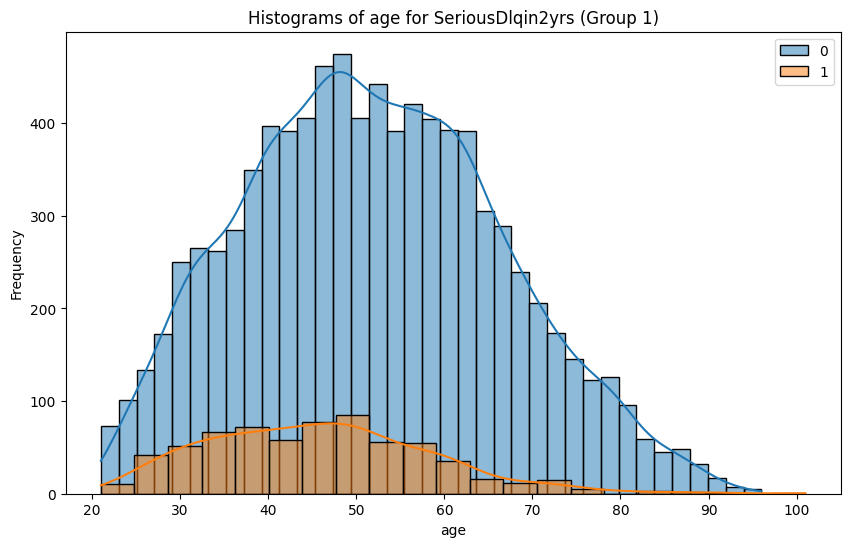

In [59]:
# VS NUMÉRICAS
for x in variables_num:
    plot_grouped_histograms(train_set, target, x, group_size=2)

In [60]:
variables_num_con_target = variables_num + [target]
corr= train_set[variables_num_con_target].corr()
serie_corr = np.abs(corr[target])
serie_corr.sort_values(ascending = False)

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.284084
age                                     0.107801
NumberOfOpenCreditLinesAndLoans         0.032472
MonthlyIncome                           0.018163
DebtRatio                               0.001863
Name: SeriousDlqin2yrs, dtype: float64

<Axes: >

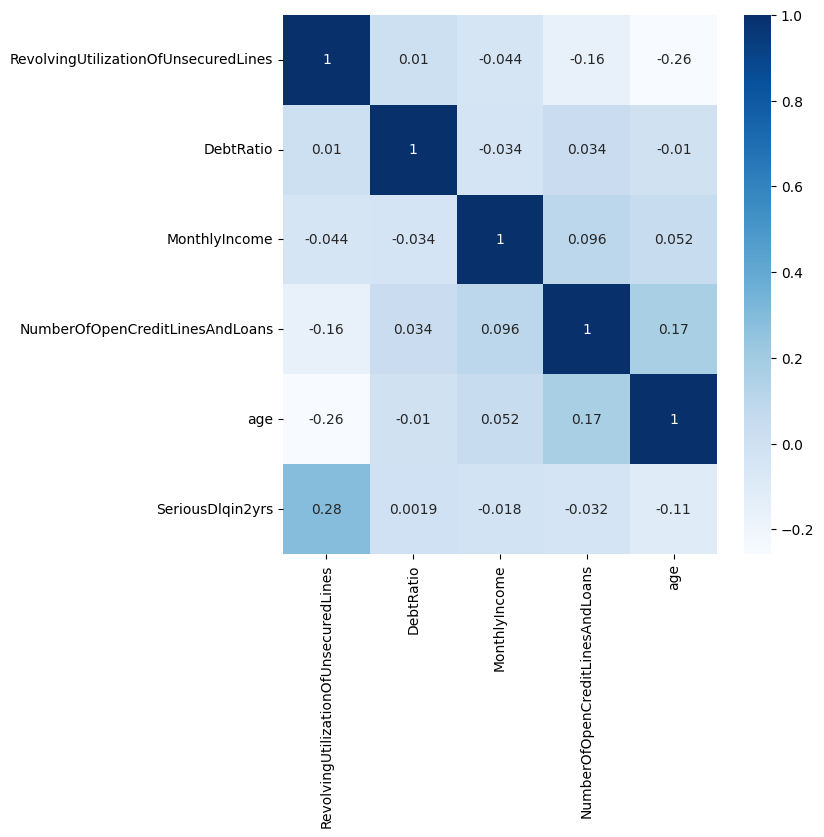

In [61]:
plt.figure(figsize=(7,7))
sns.heatmap(corr[variables_num], annot= True, cmap= "Blues")

In [62]:
variables_num_corr = serie_corr[(serie_corr > 0.05) & (serie_corr.index != "SeriousDlqin2yrs")]
variables_num_corr = variables_num_corr.index.tolist()

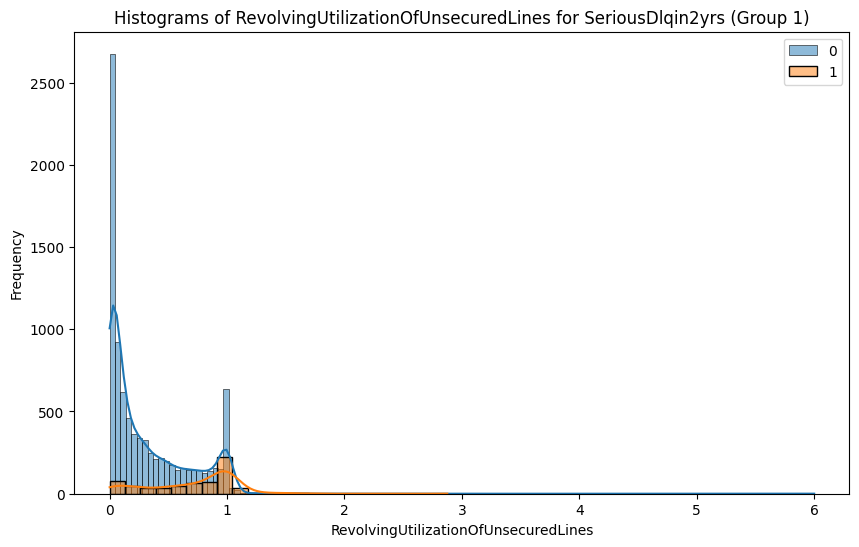

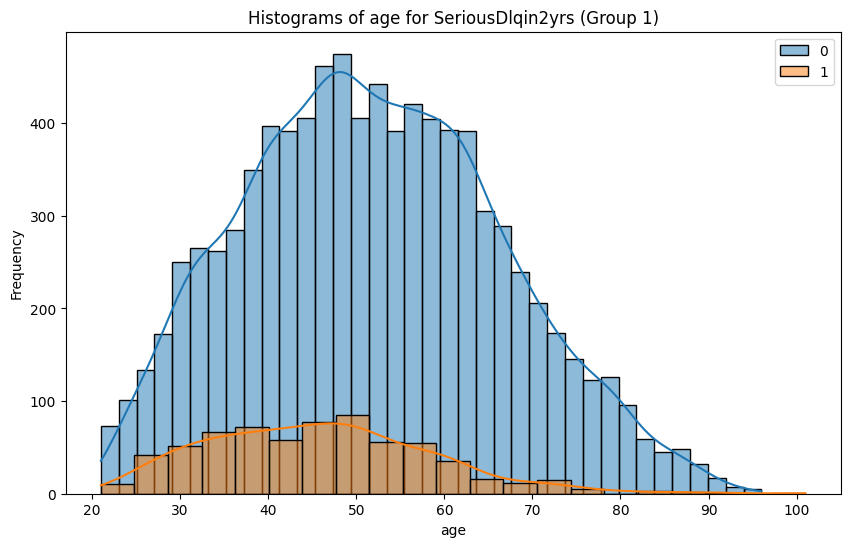

In [63]:
for x in variables_num_corr:
    plot_grouped_histograms(train_set, target, x, group_size=2)

In [64]:
y_train=train_set[target]
y_test=test_set[target]
X_train=train_set.drop("SeriousDlqin2yrs",axis=1)
X_test=test_set.drop("SeriousDlqin2yrs",axis=1)

In [65]:
#ANOVA
num_feats_anova = 5
select_feature = SelectKBest(f_classif, k=num_feats_anova).fit(X_train[variables_num], y_train)
best_features_sorted = pd.DataFrame({'Feature': X_train[variables_num].columns, 'Score': select_feature.scores_}).sort_values(by='Score', ascending=False)
variables_num_anova = select_feature.get_feature_names_out()
best_features_sorted.head()

,Feature,Score
0,RevolvingUtilizationOfUnsecuredLines,829.602605
4,age,111.110548
3,NumberOfOpenCreditLinesAndLoans,9.975168
2,MonthlyIncome,3.118382
1,DebtRatio,0.032795


In [66]:
#MUTUAL INFORMATION
for col in variables_cat:
    print(f"{col}:", mutual_info_score(train_set[col],train_set[target]))

NumberOfTime30-59DaysPastDueNotWorse_grupo: 0.016475910153522382
NumberOfDependents_grupo: 0.0008312527151092437
NumberOfTime60-89DaysPastDueNotWorse_grupo: 0.010305822201146796
NumberOfTimes90DaysLate_grupo: 0.024547249969594922
NumberRealEstateLoansOrLines_grupo: 0.0006323691804572609


In [67]:
#SELECT FROM MODEL
X_train_encoded = pd.get_dummies(X_train, columns=variables_cat,dtype = int)

In [68]:
rf_selector = RandomForestClassifier(random_state= 42)
rf_selector.fit(X_train_encoded,y_train)

RandomForestClassifier(random_state=42)

In [69]:
selector_model = SelectFromModel(estimator = rf_selector)

In [70]:
selector_model.fit(X_train_encoded,y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42))

In [71]:
selector_model.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'], dtype=object)

In [72]:
X_train_model = pd.DataFrame(selector_model.transform(X_train_encoded), columns = selector_model.get_feature_names_out())
X_train_model

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans
0,0.391240,68.0,2.693124,2166.0,13.0
1,0.906540,59.0,0.325227,6496.0,7.0
2,0.933223,52.0,0.372442,8258.0,3.0
3,0.857859,50.0,0.511098,5225.0,9.0
4,0.000000,61.0,0.414167,5166.0,5.0
...,...,...,...,...,...
9447,0.397822,53.0,0.332584,11560.0,14.0
9448,0.015171,76.0,0.005427,3500.0,4.0
9449,0.988201,62.0,0.450432,8442.0,4.0
9450,0.122072,41.0,0.638133,3749.0,9.0


In [73]:
X_train_encoded.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse_grupo_Nivel Bajo',
       'NumberOfTime30-59DaysPastDueNotWorse_grupo_Nivel Medio',
       'NumberOfTime30-59DaysPastDueNotWorse_grupo_Nivel Alto',
       'NumberOfDependents_grupo_Nivel Bajo',
       'NumberOfDependents_grupo_Nivel Medio',
       'NumberOfDependents_grupo_Nivel Alto',
       'NumberOfTime60-89DaysPastDueNotWorse_grupo_Nivel Bajo',
       'NumberOfTime60-89DaysPastDueNotWorse_grupo_Nivel Medio',
       'NumberOfTime60-89DaysPastDueNotWorse_grupo_Nivel Alto',
       'NumberOfTimes90DaysLate_grupo_Nivel Bajo',
       'NumberOfTimes90DaysLate_grupo_Nivel Medio',
       'NumberOfTimes90DaysLate_grupo_Nivel Alto',
       'NumberRealEstateLoansOrLines_grupo_Nivel Bajo',
       'NumberRealEstateLoansOrLines_grupo_Nivel Medio',
       'NumberRealEstateLoansOrLines_grupo_Nivel Alto'],
      dtype='object')

In [74]:
#RFE
rf_RFE = RandomForestClassifier(random_state= 42) 
rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 3, 
          step = 1) 
rfe.fit(X_train_encoded, y_train)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = X_train_encoded.columns).sort_values("ranking")

[ 1  2  1  1  3  5 10 15 12  8 16  6 14 18  4  7  9 13 11 17]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
DebtRatio,1
MonthlyIncome,1
age,2
NumberOfOpenCreditLinesAndLoans,3
NumberOfTimes90DaysLate_grupo_Nivel Bajo,4
NumberOfTime30-59DaysPastDueNotWorse_grupo_Nivel Bajo,5
NumberOfTime60-89DaysPastDueNotWorse_grupo_Nivel Bajo,6
NumberOfTimes90DaysLate_grupo_Nivel Medio,7
NumberOfDependents_grupo_Nivel Medio,8


In [75]:
#SFS
rf_SFS = RandomForestClassifier(random_state = 42)
sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 3,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train_encoded, y_train)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=3, scoring='balanced_accuracy')

In [76]:
print("Elegidas SFS:", sfs_forward.get_feature_names_out())

Elegidas SFS: ['RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime60-89DaysPastDueNotWorse_grupo_Nivel Bajo'
 'NumberOfTimes90DaysLate_grupo_Nivel Bajo']


##### Selección de features

**NUM**
- corr: RevolvingUtilizationOfUnsecuredLines ,age, NumberOfOpenCreditLinesAndLoans
- ANOVA: RevolvingUtilizationOfUnsecuredLines ,age, NumberOfOpenCreditLinesAndLoans
- MUTUAL: NumberOfTime30-59DaysPastDueNotWorse_grupo, NumberOfDependents_grupo, NumberOfTime60-89DaysPastDueNotWorse_grupo
- ÁRBOL: RevolvingUtilizationOfUnsecuredLines ,age, DebtRatio, MonthlyIncome
- RFE: RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, age
- SFS: RevolvingUtilizationOfUnsecuredLines, NumberOfTime60-89DaysPastDueNotWorse_grupo,NumberOfTimes90DaysLate_grupo 

In [78]:
features_final=["RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse_grupo","NumberOfDependents_grupo","NumberOfTime60-89DaysPastDueNotWorse_grupo"]

In [87]:
X_test

,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate_grupo_Nivel Bajo,NumberOfTimes90DaysLate_grupo_Nivel Medio,NumberOfTimes90DaysLate_grupo_Nivel Alto,NumberRealEstateLoansOrLines_grupo_Nivel Bajo,NumberRealEstateLoansOrLines_grupo_Nivel Medio,NumberRealEstateLoansOrLines_grupo_Nivel Alto
8653,0.091313,6307.0,14,1,0,0,1,0,0
9542,0.000000,2166.0,4,1,0,0,1,0,0
11932,0.467540,5498.0,15,1,0,0,1,0,0
796,0.991717,3500.0,9,1,0,0,1,0,0
8882,0.616590,3700.0,8,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1286,0.293055,6090.0,10,1,0,0,1,0,0
10119,0.229799,15308.0,19,1,0,0,0,1,0
8600,0.849322,4200.0,8,1,0,0,0,1,0
6818,0.474848,5108.0,7,1,0,0,0,1,0


In [80]:
columnas_a_eliminar = [col for col in X_train.columns if col in features_final]

X_train = X_train.drop(columns=columnas_a_eliminar)
X_test = X_test.drop(columns=columnas_a_eliminar)

In [84]:
X_train = pd.get_dummies(X_train, columns=["NumberOfTimes90DaysLate_grupo","NumberRealEstateLoansOrLines_grupo"],dtype = int)

KeyError: "None of [Index(['NumberOfTimes90DaysLate_grupo', 'NumberRealEstateLoansOrLines_grupo'], dtype='object')] are in the [columns]"

In [85]:
X_test = pd.get_dummies(X_test, columns=["NumberOfTimes90DaysLate_grupo","NumberRealEstateLoansOrLines_grupo"],dtype = int)

In [91]:
X_test["MonthlyIncome"]=X_test["MonthlyIncome"].apply(lambda x: np.log(x + 1))
X_train["MonthlyIncome"]=X_train["MonthlyIncome"].apply(lambda x: np.log(x + 1))

In [98]:
scaler = MinMaxScaler()
X_train[["DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans"]] = scaler.fit_transform(X_train[["DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans"]])
X_test[["DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans"]] = scaler.fit_transform(X_test[["DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans"]])

In [104]:
#Escoge 3 modelos
model_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model_xgb.fit(X_train, y_train)
scores_xgb = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='balanced_accuracy')
mean_score_xgb = scores_xgb.mean()
print("Promedio de los scores con XGBoost:", mean_score_xgb)

Promedio de los scores con XGBoost: 0.5662066471624361


In [105]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
model_rf.fit(X_train, y_train)
scores_xgb = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='balanced_accuracy')
print("Promedio de los scores con RandomForestClassifier:", scores_xgb.mean())

Promedio de los scores con RandomForestClassifier: 0.5734098407923853


In [109]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
scores_knn = cross_val_score(model_knn, X_train, y_train, cv=5, scoring='balanced_accuracy')
mean_score_knn = scores_knn.mean()
print("Promedio de los scores con KNN:", mean_score_knn)

Promedio de los scores con KNN: 0.5731319070235366


In [111]:
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [5, 10, 20, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False]  
}
model_rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=param_grid, n_iter=100, cv=5, 
                                   scoring='balanced_accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print("Mejores hiperparámetros encontrados:", random_search.best_params_)
best_score = random_search.best_score_
print("Mejor score con RandomForestClassifier:", best_score)

Mejores hiperparámetros encontrados: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}
Mejor score con RandomForestClassifier: 0.5791517916461469


In [113]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy en datos de prueba:", balanced_acc)

Balanced Accuracy en datos de prueba: 0.5723468856551803


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.